In [4]:
from data_pipeline import *
from syntren import *
import matplotlib.pyplot as plt
from utils import *
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram

In [12]:
root_gene = None # 'CRP'
minimum_evidence = 'weak'
max_depth = np.inf
r_expr, gene_symbols, sample_names = load_data(root_gene=root_gene,
                                     minimum_evidence=minimum_evidence,
                                     max_depth=max_depth)

# Split data into train and test sets
train_idxs, test_idxs = split_train_test(sample_names)
expr_train = r_expr[train_idxs, :]
expr_test = r_expr[test_idxs, :]

# Obtain data
s_expr = np.random.rand(*expr_train.shape)

# Adjust scale of data
mean = np.mean(s_expr, axis=0)
std = np.std(s_expr, axis=0)
s_expr = (s_expr - mean)/std

mean = np.mean(expr_train, axis=0)
std = np.std(expr_train, axis=0)
s_expr = s_expr * std + mean
# s_expr = s_expr*(r_max - r_min) + r_min
# s_expr = s_expr*7 + 5

# Clip outliers
r_min = expr_train.min()
r_max = expr_train.max()
s_expr[s_expr < r_min] = r_min
s_expr[s_expr > r_max] = r_max

Found 4297 genes in datafile


# Intensity histograms

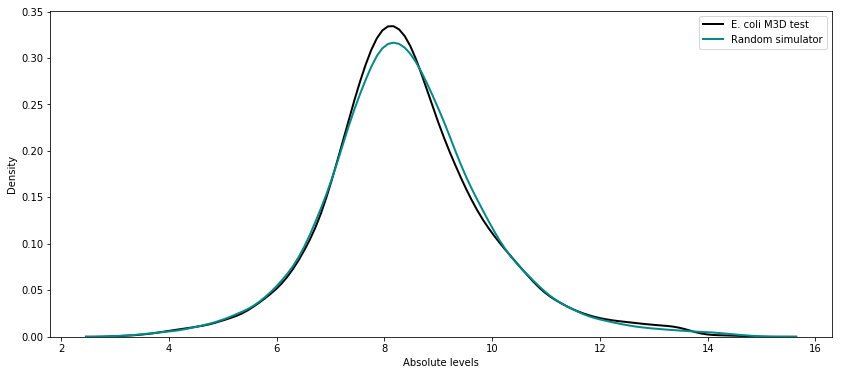

In [45]:
plt.figure(figsize=(14, 6))
ax = plot_intensities(expr_train, plot_quantiles=False, color='black', dataset_name='E. coli M3D test')
plot_intensities(s_expr, dataset_name='Random simulator', color='darkcyan', plot_quantiles=False, ax=ax);

# Gene ranges histograms

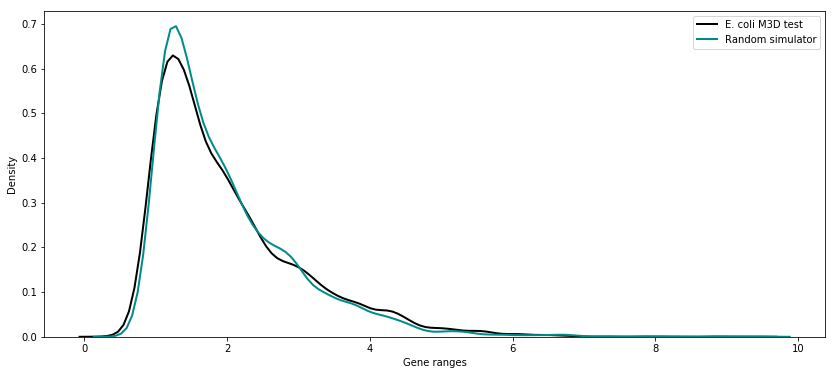

In [46]:
plt.figure(figsize=(14, 6))
ax = plot_gene_ranges(expr_test, color='black', dataset_name='E. coli M3D test')
plot_gene_ranges(s_expr, dataset_name='Random simulator', color='darkcyan', ax=ax);

# TF-TG histogram (using synthetic background distribution)

In [47]:
r_tf_tg_corr, r_tg_tg_corr = compute_tf_tg_corrs(expr_test, gene_symbols)
s_tf_tg_corr, s_tg_tg_corr = compute_tf_tg_corrs(s_expr, gene_symbols)
r_back_corr = correlations_list(expr_test, expr_test)
s_back_corr = correlations_list(s_expr, s_expr)

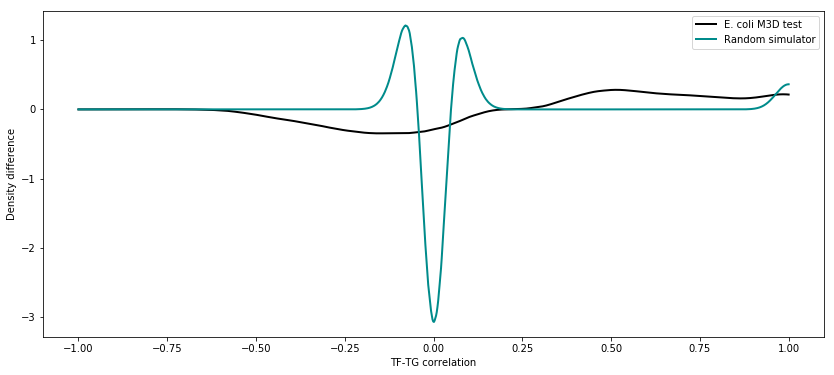

In [48]:
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tf_tg_corr, r_back_corr, 'TF-TG correlation', color='black', dataset_name='E. coli M3D test')
plot_difference_histogram(s_tf_tg_corr, s_back_corr, 'TF-TG correlation', dataset_name='Random simulator', color='darkcyan', ax=ax);

# TG-TG histogram (using synthetic background distribution)

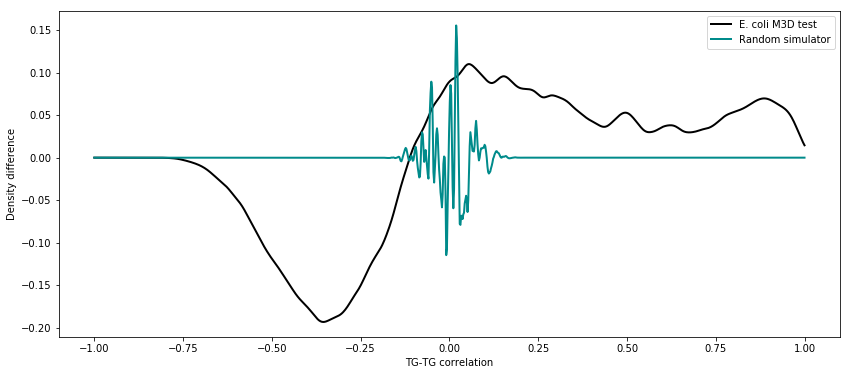

In [49]:
plt.figure(figsize=(14, 6))
ax = plot_difference_histogram(r_tg_tg_corr, r_back_corr, 'TG-TG correlation', color='black', dataset_name='E. coli M3D test')
plot_difference_histogram(s_tg_tg_corr, s_back_corr, 'TG-TG correlation', dataset_name='Random simulator', color='darkcyan', ax=ax);

# Background distributions

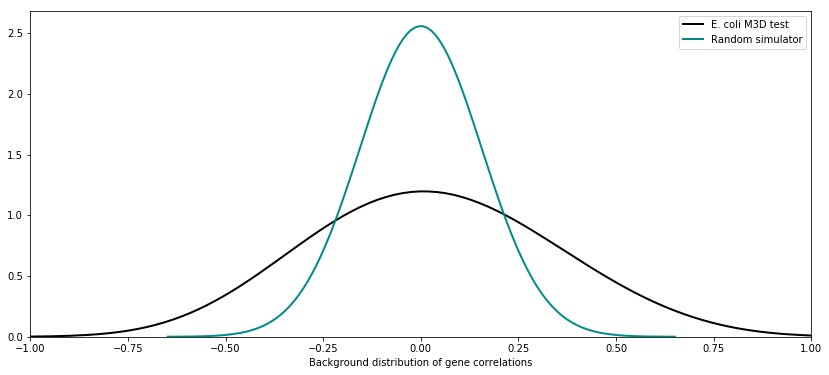

In [50]:
plt.figure(figsize=(14, 6))
ax = plot_distribution(r_back_corr, xlabel='Background distribution of gene correlations', color='black', label='E. coli M3D test')
ax = plot_distribution(s_back_corr, xlabel='Background distribution of gene correlations', label='Random simulator', color='darkcyan')
ax.set_xlim((-1, 1));

# TF activity histogram

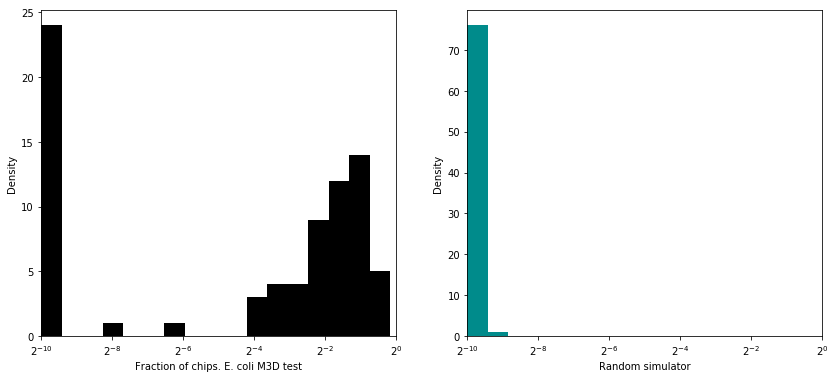

In [9]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_tf_activity_histogram(expr_train, gene_symbols, color='black', xlabel='Fraction of chips. E. coli M3D test')
plt.subplot(122)
plot_tf_activity_histogram(s_expr, gene_symbols, xlabel='Random simulator', color='darkcyan');

# Quantitative analysis

In [13]:
scores = compute_scores(expr_train, s_expr, gene_symbols)
score_names = ['S_dist', 'S_dend', 'S_sdcc', 'S_tftg', 'S_tgtg', 'S_tfac']
print('Random')
for name, score in zip(score_names, scores):
    print('{}: {}'.format(name, score))

Random
S_dist: 0.0002575608634032706
S_dend: 0.0003342659512788878
S_sdcc: 0.24260699479521583
S_tftg: 0.2711365005187454
S_tgtg: -0.002683156869467842
S_tfac: -0.061393110405636206
